# Citibike Trip Data Analysis


* who's the fastest for a given station-staion route

* what's the longest trip/who are they?

* what's the most popular/least popular station (by time of day)

* correlation between gender and duration

* gender and trip time of day

* distance from Google Maps Distance API or haversine distance (crow flies)

## Initial setup and data load

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from location import location
%matplotlib inline

/home/dvndrsn/.pyenv/versions/3.5.0/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
file = '~/dev/data/citibike/201510-citibike-tripdata.csv'

data=pd.read_csv(file, header=0, parse_dates=['starttime','stoptime',])

### Parse date parameters

In [3]:
# parsed this data while loading the CSV now
# TODO does not work without errors='raise' but no errors - research if this is a bug!
# data['starttime']=pd.to_datetime(data['starttime'],errors='raise')

# parse date values from starttime
data['date']=data['starttime'].apply(lambda x: x.date())
data['year']=data['starttime'].apply(lambda x: x.year)
data['month']=data['starttime'].apply(lambda x: x.month)
data['day']=data['starttime'].apply(lambda x: x.day)
data['weekday']=data['starttime'].apply(lambda x: x.isoweekday())
data['hour']=data['starttime'].apply(lambda x: x.hour)

### Define distance and location parameters

In [5]:
data['start_loc']=data.apply(
    lambda x:
    location(x['start station longitude'],
             x['start station latitude']),
    axis=1)

In [6]:
data['end_loc']=data.apply(
    lambda x:
    location(x['end station longitude'],
             x['end station latitude']),
    axis=1)

In [7]:
data['harversine_dist']=data.apply(
     lambda x:
     x['start_loc'].harversine(x['end_loc']),
     axis=1)

In [8]:
# Assumed speed of 11 Km/h for all users? This is used by citibike
# for internal purposes.
data['assume_dist']=data['tripduration']* 11 / (60 * 60)

In [9]:
data.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                        float64
gender                              int64
date                               object
year                                int64
month                               int64
day                                 int64
weekday                             int64
hour                                int64
start_loc                          object
end_loc                            object
harversine_dist                   

In [10]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,date,year,month,day,weekday,hour,start_loc,end_loc,harversine_dist,assume_dist
0,171,2015-10-01 00:00:02,2015-10-01 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,...,2015-10-01,2015,10,1,4,0,"(40.75, -74.00)","(40.75, -74.00)",548.797673,0.522500
1,593,2015-10-01 00:00:02,2015-10-01 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,...,2015-10-01,2015,10,1,4,0,"(40.75, -73.97)","(40.73, -73.99)",2451.478905,1.811944
2,233,2015-10-01 00:00:11,2015-10-01 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,...,2015-10-01,2015,10,1,4,0,"(40.76, -73.99)","(40.76, -73.99)",0.000000,0.711944
3,250,2015-10-01 00:00:15,2015-10-01 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,...,2015-10-01,2015,10,1,4,0,"(40.73, -74.00)","(40.74, -74.00)",819.313876,0.763889
4,528,2015-10-01 00:00:17,2015-10-01 00:09:05,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,539,Metropolitan Ave & Bedford Ave,40.715348,...,2015-10-01,2015,10,1,4,0,"(40.72, -73.95)","(40.72, -73.96)",1101.904913,1.613333


## Citibike - Trips by Age
Noted a few gaps for different years. Any possible data issues with file provided by Citibike?

In [11]:
# Ignore trip data with birth years before 1930
# TODO - investigate birth year before 1930 - data issue?
birth=data[data['birth year']>1930].dropna()['birth year']

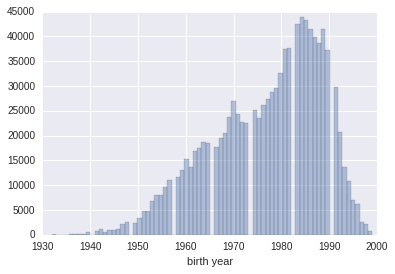

In [12]:
# histogram of birth year
sns.distplot(birth, bins=75, kde=False) 
#, bins=50, range=(1930,2010), kde = True)

## Trips by hour

In [13]:
timedata=data
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.to_datetime.html


In [14]:

# type(timedata['starttime'][7])

# pd.to_datetime(timedata['starttime'][1:1])

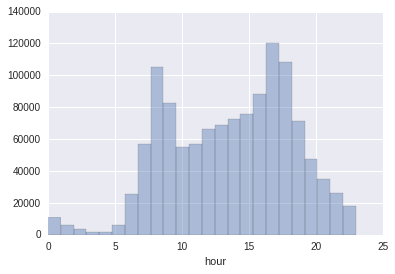

In [15]:
sns.distplot(timedata['hour'],kde=False, bins=24)

## Hourly Trips by Gender
0 - Unknown
1 - Male
2 - Female

Men and women have similar usage patters, unknown gender (typically casual customer) takes trip mainly during the day.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab088ac438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fab0d85e588>]], dtype=object)

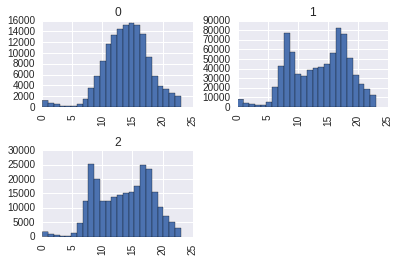

In [16]:
timedata['hour'].hist(by=timedata['gender'],bins=24)

### Average trip length for each user type / gender
We can see that male subscribers typically take shorter trips than female subscfibers. Casual customers, on average take more than twice as long as any subscribers.
* How does the length of trips taken by men and women subcribers compare? Are men being faster/more reckless while biking (running red lights, etc.)?
* The average length of a casual member's trip is 8 minutes longer than the alloted limit for casual members (30 minutes), which will incur extra charges. What are the average extra charges incurred by customers/subscribers?


In [17]:
timedata.groupby(['usertype','gender'])['tripduration'].mean()/60

usertype    gender
Customer    0         38.460647
Subscriber  0         18.231131
            1         14.247137
            2         18.116207
Name: tripduration, dtype: float64

### Count of trip records for user type/gender
We can see that Male subscribers take significantly more trips than female subscribers or casual customers.
* What are the number of active subscribers for men vs. women? Any way to determine this?

In [18]:
# arbirary column selected (bikeid) 
timedata.groupby(['usertype','gender'])['bikeid'].count()

usertype    gender
Customer    0         146511
Subscriber  0           1877
            1         807097
            2         256792
Name: bikeid, dtype: int64

## Distance calculations
### Average distance (Km) by gender / user type
Interestingly, the average distance traveled is pretty much the same across all user types

In [19]:
timedata.groupby(['usertype','gender'])['harversine_dist'].mean()

usertype    gender
Customer    0         1851.072367
Subscriber  0         1741.759819
            1         1736.977762
            2         1807.581307
Name: harversine_dist, dtype: float64

### Average speed (Km/h) by gender / user type
Men are covering more ground than women subscribers. Tourists are slow!

Note: calculations use harversine distance (as crow flies) so actual distance traveled should be longer (and speed should be higher).

For cyclists in Copenhagen, the average cycling speed is 15.5 km/h (9.6 mph). On a racing bicycle, a reasonably fit rider can ride at 40 km/h (25 mph) on flat ground for short periods. [Wikipedia](https://en.wikipedia.org/wiki/Bicycle_performance#Typical_speeds)

In [20]:
timedata.groupby(['usertype','gender'])['harversine_dist'].mean()/ \
(timedata.groupby(['usertype','gender'])['tripduration'].mean() / (60 * 60))

usertype    gender
Customer    0         2887.739842
Subscriber  0         5732.260263
            1         7315.060040
            2         5986.621740
dtype: float64

### Estimate Potential errorby Harversine Distance?
Typically assumed distance (with constant speed 7 Km/h) is 2 Km less than calculated harversine distance.

In [21]:
timedata.groupby(['usertype','gender'])['harversine_dist'].mean() - \
timedata.groupby(['usertype','gender'])['assume_dist'].mean()


usertype    gender
Customer    0         1844.021248
Subscriber  0         1738.417445
            1         1734.365787
            2         1804.260002
dtype: float64

## Next steps
* More pretty graphs of new calculated data.
* Use [Google Maps Distance matrix API](https://developers.google.com/maps/documentation/distance-matrix/intro) to calculate the optimal distance between stations.
* Output some summary of bikes in/bikes out by station ID, 
* Graph of a particular bike's travels in a month, with stations as nodes
* Get some weather data [Weather UnderGround API](http://www.wunderground.com/weather/api/d/docs?d=data/astronomy)
 * Sunrise/sunset
 * cloud/sun/rain/snow
 * wind?
 * phase of moon (for werewolf brookylnites biking after midnight)
* Build a model using bikes in, bikes out as a function of location (lat/long), time (year, month, day of week, hour... [holiday](https://pypi.python.org/pypi/holidays)?) and conditions (temperature, precip, etc.)